# Exercise: Air pollution patterns
### Introduction
In the video you learned that the World Health Organisation defines air pollution as: "Contamination of the indoor or outdoor environment by any chemical, physical or biological agent that modifies the natural characteristics of the atmosphere". It consitutes the greatest environmental risk to health. The example presented in the video focused on air pollution by particles; in this exercise you'll study another harmful component of the atmosphere: nitrogen dioxide, which has the chemical formula NO$_2$, and is formed during combustion processes. NO$_2$ is harmful to human health, enhancing asthma conditions and leading to premature mortality. Moreover, NO$_2$ reacts in the atmosphere to form other harmful compounds such as ozone (O$_3$) and particles.

This exercise is about the patterns of NO$_2$, in time and space. You will work with a real, 5 years long satellite data set of NO$_2$ concentrations. The data was obtained by the TROPOMI instrument on ESA's Sentinel-5p, which observes the composition of the atmosphere at high spatial resolution. You will use python programming to inspect the seasonal cycle and long-term trend of NO$_2$ in various cities in the world and interpret the findings.
The data you will work with are described in: Goldberg et al. (2021)

Goldberg, D. L., Anenberg, S. C., Kerr, G. H., Mohegh, A., Lu, Z., & Streets, D. G. (2021). TROPOMI NO2 in the United States: A Detailed Look at the Annual Averages, Weekly Cycles, Effects of Temperature, and Correlation With Surface NO2 Concentrations. Earth’s Future, 9(4), e2020EF001665. https://doi.org/10.1029/2020EF001665


### Learning outcome:

At the end of the exercise, you will be able to: Perform simple visualization and analysis of satellite data using Python and Jupiter notebooks 


### Getting started
Watch the the following video to learn about smog and nitrogen oxide pollution:
https://youtu.be/CdbBwIgq4rs

Then follow the steps in the notebook below. 


You will perform a time series analysis of NO$_2$ in Enschede and in the cities mentioned in the video (Los Angeles, Beijing, Mexico City, Santiago de Chile, New Delhi, and Tehran).

If you have some python experience, feel free to experiment with the settings to investigate how NO$_2$ levels varied within your own city!
If you are new to python programming or jupyter notebooks, it may be beneficial to start by following these tutorials:

For jupyter notebooks: https://realpython.com/jupyter-notebook-introduction/

For python programming language: https://www.dataquest.io/course/introduction-to-python/

Within this exercise we rely heavily on python's xarray library, which is very good at handling the gridded satellite data sets we're using. If you want to learn to use xarray, try this tutorial:
https://tutorial.xarray.dev/overview/xarray-in-45-min.html

In [2]:
# Initialize libraries

import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose


/home/jovyan/.local/lib/python3.8/site-packages/ecmwflibs/__init__.py:131: UserWarning: ecmwflibs universal: found eccodes at /usr/local/lib/libeccodes.so
  warnings.warn(f"ecmwflibs universal: found {name} at {path}")


1. Open the data set on which you will do the analysis. The data consists of daily global observations of tropospheric NO$_2$ by the TROPOMI instrument. For information about the joint Dutch-built TROPOsphere Monitoring Instrument, see https://www.tropomi.eu/

In [3]:
# Open multiple data files into one dataset
mainpath = "/home/jovyan/private/AQ/data/NO2/"  #  Insert here the path where the NO2 data can be found
flist = [mainpath + "HAQ_TROPOMI_NO2_GLOBAL_QA75_L3_Monthly_201901-201912_V2.4.nc",
         mainpath + "HAQ_TROPOMI_NO2_GLOBAL_QA75_L3_Monthly_202001-202012_V2.4.nc",
         mainpath + "HAQ_TROPOMI_NO2_GLOBAL_QA75_L3_Monthly_202101-202112_V2.4.nc",
         mainpath + "HAQ_TROPOMI_NO2_GLOBAL_QA75_L3_Monthly_202201-202212_V2.4.nc",
         mainpath + "HAQ_TROPOMI_NO2_GLOBAL_QA75_L3_Monthly_202301-202312_V2.4.nc"]
ds = xr.open_mfdataset(flist)

#Then display the dataset contents
print(ds)

<xarray.Dataset>
Dimensions:           (Time: 60, Latitude: 1350, Longitude: 3590)
Coordinates:
  * Time              (Time) datetime64[ns] 2019-01-15 2019-02-15 ... 2023-12-15
  * Latitude          (Latitude) float32 -59.95 -59.85 -59.75 ... 74.85 74.95
  * Longitude         (Longitude) float32 -179.4 -179.3 -179.2 ... 179.4 179.4
Data variables:
    Tropospheric_NO2  (Time, Latitude, Longitude) float32 dask.array<chunksize=(12, 1350, 3590), meta=np.ndarray>
    Number_obs        (Time, Latitude, Longitude) float32 dask.array<chunksize=(12, 1350, 3590), meta=np.ndarray>


This data set contains two variables: "Tropospheric_NO2", which is the monthly mean NO$_2$ concentration in the troposphere and the variable we are interested in; and "Number_obs", the number of observations that contributed to the monthly mean. The unit of Tropospheric_NO2 is molecules per cm$^{-2}$, which is the number of molecules within a "column" of air from the top of the troposphere to the surface (the "tropospheric column density"). The unit is not very intuitive, but is generally closely related to the near-surface concentration, which is relevant for human health.

The data set consists of 60 time steps (5 years * 12 months), as you can see in the "Dimensions" given above (if you've executed the accompanying python code cell). Each time step contains a map with a resolution of 0.1 degrees of latitude * longitude. There are 3590 steps in longitudinal direction, but only 1350 in latitude, because the data set does not cover the higher latitudes. You can check this by investigating the "Latitude" coordinate range above.



### 1. a. Make a global map of the long-term mean NO$_2$ concentration (whole data series).

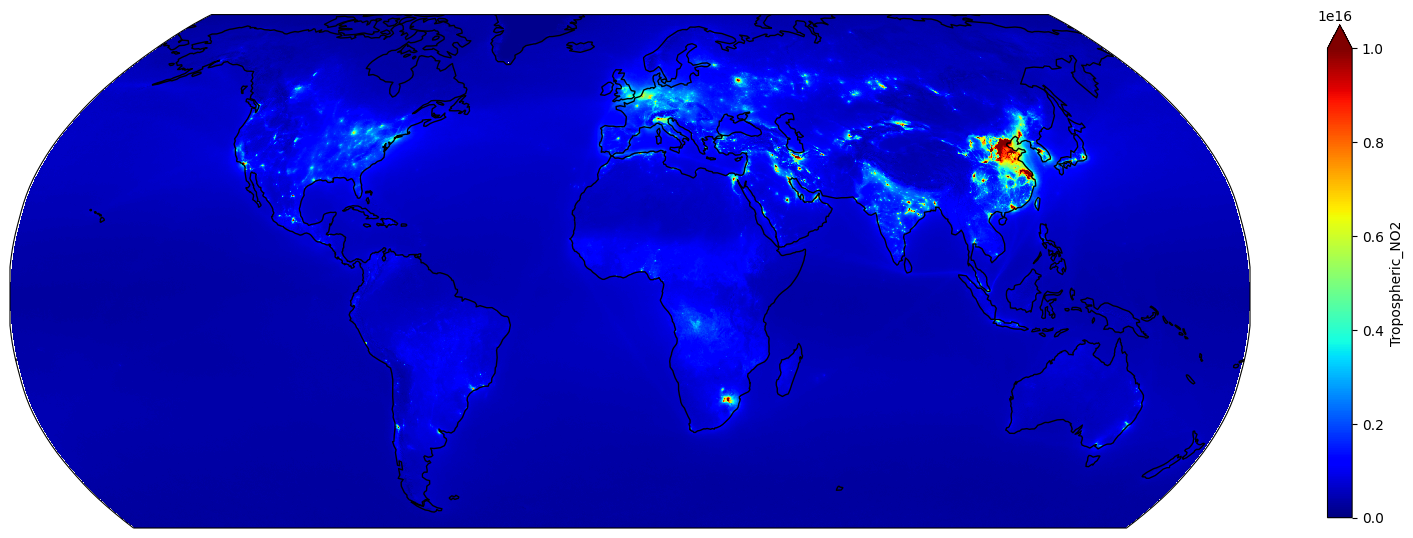

In [4]:
import cartopy.crs as ccrs

# First calculate the climatology (multi-year mean)
# but only if b_calculate is True

b_calculate = True  # set to True if the climatology needs to be calculated (time-consuming step!)

if b_calculate:
    no2_clim = ds.Tropospheric_NO2.mean(dim='Time')

plt.figure(figsize=(20,16))
ax = plt.axes(projection=ccrs.Robinson())
ax.coastlines()
no2_clim.plot(ax=ax, transform=ccrs.PlateCarree(),
         vmin=0, vmax=1e16, cmap='jet', cbar_kwargs={'shrink': 0.4})

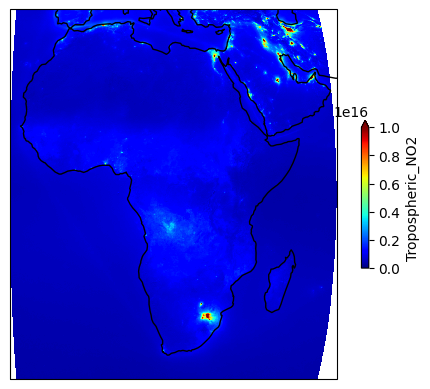

In [5]:
#---OPTIONAL---
#---You can zoom in to a region by "slicing" the data set---
# Uncomment the coordinates you like or invent a new combination for your region of interest!
coords = {'Latitude': slice(-40, 40), 'Longitude': slice(-20, 60)} # Africa and Middle East
#coords = {'Latitude': slice(-60, 20), 'Longitude': slice(-100, -30)} # South America
#coords = {'Latitude': slice(-10, 60), 'Longitude': slice(65, 145)} # Southeast Asia
#coords = {'Latitude': slice(35, 60), 'Longitude': slice(-15, 45)} # Europe

ax = plt.axes(projection=ccrs.Robinson())
ax.coastlines()
no2_clim.sel(coords).plot(ax=ax, transform=ccrs.PlateCarree(),
         vmin=0, vmax=1e16, cmap='jet', cbar_kwargs={'shrink': 0.4})


If you have some experience with python I encourage you to change the coordinates, color bar range and colormap to focus on particular features. Can you interpret the patterns?

### 2. Plot time series of daily NO$_2$ data for a number of big cities (and Enschede)
Before you plot the data, think of which roles the location and prevailing meteorology of the city play. Which cities do you expect to show highest NO$_2$ levels and which show the lowest?

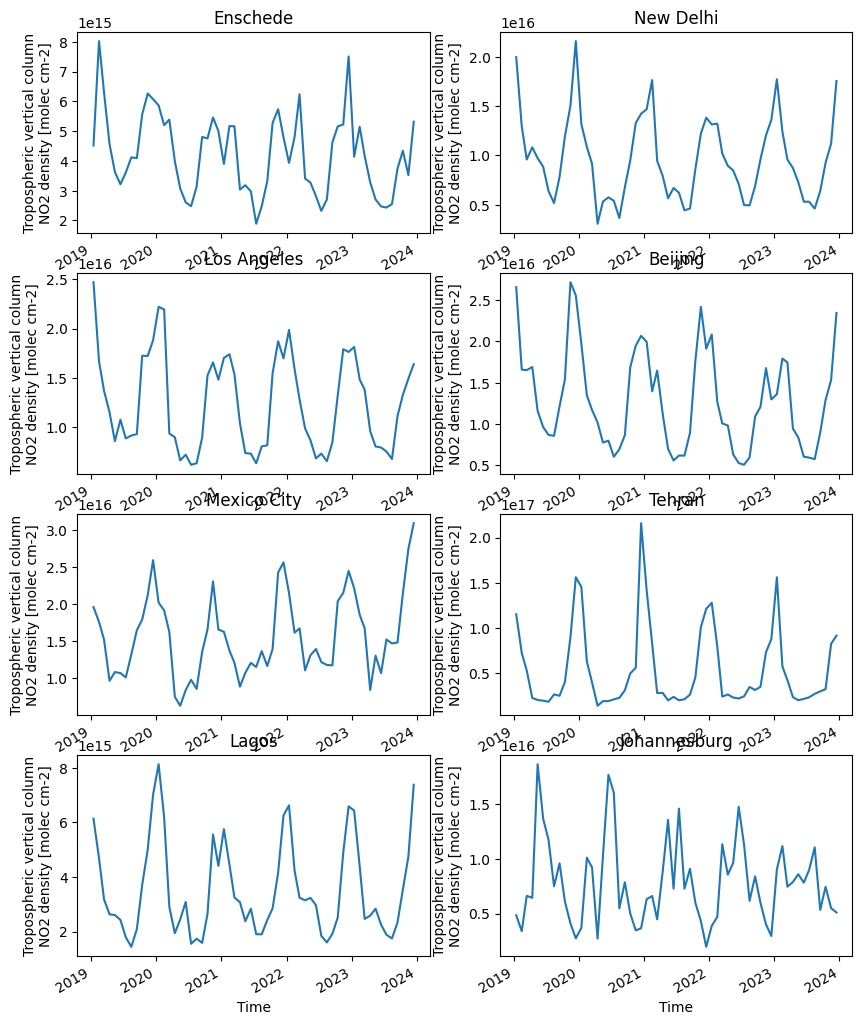

In [4]:
# Coordinates of cities are given in a dictionary
cities_coords = {"Enschede": {'Latitude': 52.2, 'Longitude': 6.9},
                 "New Delhi": {'Latitude': 28.65, 'Longitude': 77.23},
                 "Los Angeles": {'Latitude': 34.05, 'Longitude': -118.24},
                 "Beijing": {'Latitude': 39.90, 'Longitude': 116.41},
                 "Mexico City": {'Latitude': 19.35, 'Longitude': -99.19},
                 "Tehran": {'Latitude': 35.72, 'Longitude': 51.38},
                 "Lagos": {'Latitude': 6.45, 'Longitude': 3.39},
                 "Johannesburg": {'Latitude': -26.20, 'Longitude': 28.04}}

fig = plt.figure(figsize=(10,12))
# Plot the time series in separate panels
for (city_key, k) in zip(cities_coords.keys(), range(1,9)):
    ax = fig.add_subplot(4,2,k)
    city_coords = cities_coords[city_key]
    no2_series = ds.Tropospheric_NO2.sel(city_coords, method='nearest')
    no2_series.plot(ax=ax, label=city_key)
    plt.title(city_key)

Text(0.5, 1.0, 'NO$_2$ Levels in cities between 2019 and 2023')

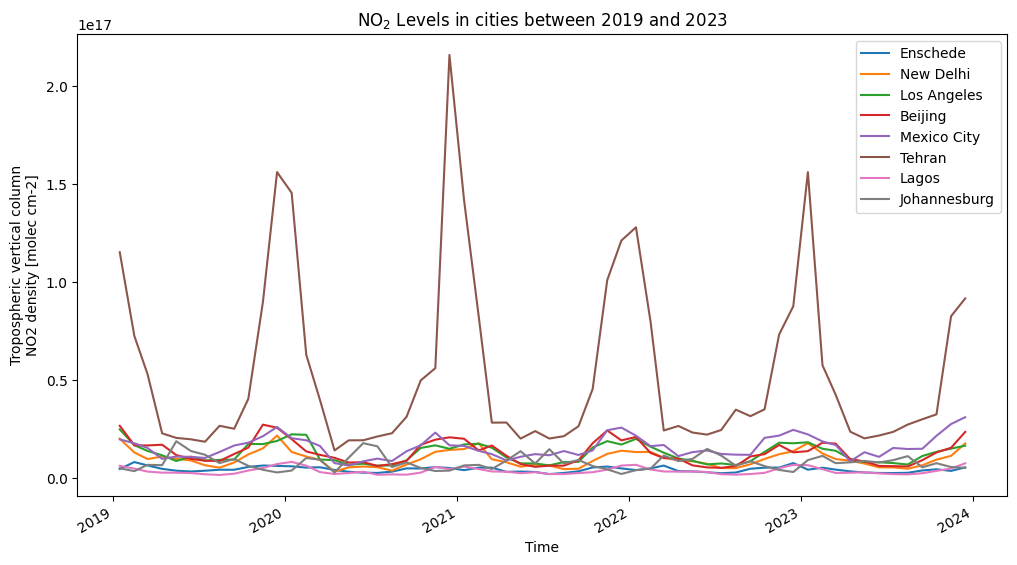

In [5]:
# Or plot them all together in one figure:
fig2 = plt.figure(figsize=(12,6))
ax2 = fig2.add_subplot(111)
for (city_key, k) in zip(cities_coords.keys(), range(1,9)):
    city_coords = cities_coords[city_key]
    no2_series = ds.Tropospheric_NO2.sel(city_coords, method='nearest')
    no2_series.plot(ax=ax2, label=city_key)
plt.legend()
plt.title('NO$_2$ Levels in cities between 2019 and 2023')


### 3. Perform a time series analysis using the statsmodels library of daily NO$_2$ data for your city of interest

You may have noticed the periodicity of the time series you plotted in task 2. In this task, you will apply the statsmodels tool to pry apart the different contributions to the time series. Many atmospheric components, like NO$_2$, display a seasonal cycle, which is what causes the periodicity seen above. This is often due to a combination of the seasonality of meteorological variables and emissions patterns. Moreover, time series can display trends. For NO$_2$, which is closely linked to anthropogenic emissions, this is usually linked to changes in fossil fuel consumption, which may be due to changes in legislation or economic developments. In the analysis you will perform during task 3, you will create a plot with four panels. The upper one contains the original time series, the second contains the trend, the third the seasonal cycle and the lowest panel contains the residual. That is essentially the result of the original data minus trend and seasonal cycle, and shows the NO$_2$ levels that cannot be explained by trend or seasonal cycle. Extreme values would show up clearly in the lowest panel.

Select three cities from the list and perform the time series analysis by executing the steps below. Note that parts of the code are pretty advanced programming. It is not important that you understand the details, but focus on the findings instead.

Before you perform the analysis, take a minute to think about the expected outcome and note the answers to the following questions:
- Have the NO$_2$ levels in the city increased or decreased in the past 20 years?
- Which factors contributed to the in- or decrease? (Think of population growth, increasing numbers of vehicles, and of limiting factors like changes in legislation)



In [6]:
# Here we define three helper functions
# Execute these blocks without changing them
# You don't need to understand these!

def make_df_without_nan(t, y, ylabel='NO2', tlabel='time'):
    """Seasonal_decompose does not work on data sets containing NaNs,
       so this function removes all NaN entries before putting the
       numpy arrays into a dataframe"""
    import pandas as pd
    import numpy as np
    
    k_notnan = np.isfinite(y)    
    d = {tlabel: t[k_notnan], ylabel: y[k_notnan]}
    df = pd.DataFrame(data=d)
    
    return d


def fill_nan(y):
    """
    interpolate to fill nan values
    """
    inds = np.arange(y.shape[0])
    k_good = np.where(np.isfinite(y))
    f = interpolate.interp1d(inds[k_good], y[k_good],bounds_error=False)
    y_new = np.where(np.isfinite(y),y,f(inds))
    return y_new


def nan_helper(y):
    """Helper to handle indices and logical indices of NaNs.

    Input:
        - y, 1d numpy array with possible NaNs
    Output:
        - nans, logical indices of NaNs
        - index, a function, with signature indices= index(logical_indices),
          to convert logical indices of NaNs to 'equivalent' indices
    Example:
        >>> # linear interpolation of NaNs
        >>> nans, x= nan_helper(y)
        >>> y[nans]= np.interp(x(nans), x(~nans), y[~nans])
    """

    return np.isnan(y), lambda z: z.nonzero()[0]

In [7]:
"""
The statistics package we will use requires numpy arrays as input
So here we first transform the time series of each city in our dictionary
into a numpy array and store it in a new dictionary: cities_data
"""
cities_data = {}
for city_key in cities_coords.keys():
    city_coords = cities_coords[city_key]
    no2_series = ds.Tropospheric_NO2.sel(city_coords, method='nearest').to_numpy()
    cities_data[city_key] = no2_series


In [10]:
"""
Now we can do the analysis for a city of interest by entering its "key" into ckey
The keys that can be selected are:
"Enschede"
"New Delhi"
"Los Angeles"
"Mexico City"
"Tehran"
"Lagos"
"Johannesburg"
"""
ckey = "Johannesburg"

if ckey in cities_data.keys():
    no2_data = cities_data[city_key]
else:
    no2_data = []
    print("City not in dictionary!")

df_analysis = ds.Time.to_dataframe(name= 'time')
df_analysis = df_analysis.drop(columns=['time'])


# ---Need to remove missing values from NO2 data (by interpolation)---
nans, x= nan_helper(no2_data)
no2_data[nans]= np.interp(x(nans), x(~nans), no2_data[~nans])
#no2_nonan = fill_nan(no2data)  # Alternative to the fancy method
df_analysis['NO2'] = no2_data

# ---Time series decomposition---
decompose_result_mult = seasonal_decompose(x=df_analysis, model="additive", period=11)

trend = decompose_result_mult.trend
seasonal = decompose_result_mult.seasonal
residual = decompose_result_mult.resid

# ---Plotting results---
plt.figure(figsize=(12, 8))
# plt.grid(True, linestyle='--', alpha=0.7)

# Plot components
plt.subplot(411)
plt.plot(df_analysis.index, df_analysis['NO2'], label='Original')
plt.legend(loc='upper left')

plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='upper left')

plt.subplot(413)
plt.plot(seasonal, label='Seasonal')
plt.legend(loc='upper left')

plt.subplot(414)
plt.scatter(df_analysis.index, residual, label='Residual', color='dodgerblue', marker='o', s=10)
plt.axhline(0, color='black', linestyle='--', linewidth=0.8)
plt.legend(loc='upper left')

plt.tight_layout()

plt.show()

City not in dictionary!


TypeError: only integer scalar arrays can be converted to a scalar index

### 4. Analyze the results

Answer the following questions:

   a) What are the main sources of NO$_2$ pollution?
    
   b) Compare the magnitudes of the NO$_2$ concentrations in the cities analyzed in task 2. How do you explain the differences?
    
   c) Is there a long-term linear trend apparent in NO$_2$ data for the three investigated cities in task 3? Is the trend positive or negative? What may be the cause of the trend?
    
   d) Is there a seasonal cycle visible in the NO$_2$ data of the different cities? What might it be caused by?